In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("format2.csv")

# Preprocess data: remove rows with missing values in 'context' and 'question'
df = df.dropna(subset=['context', 'question']).reset_index(drop=True)
df.head()

,id,qid,docid,context,question
0,0,0,1000,Local governments can promote carbon footprint...,What actions can local governments take to pro...
1,1,1,1001,"Yes, you can estimate your flight pollution us...",Where can I access a calculator for determinin...
2,2,2,1002,Plastic waste significantly contributes to **c...,What effects does plastic waste have on carbon...
3,3,3,1003,TRANSNATIONAL CORPORATION:\nA company that ope...,What does the abbreviation 'TNC' represent in ...
4,4,4,1004,Renewable energy sources like **solar** and **...,How can we reduce carbon footprints using sust...


In [3]:
# Vectorize context data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['context'])

C:\Users\samit_000\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\samit_000\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\samit_000\Anaconda3\lib\site-packages\sklearn\m

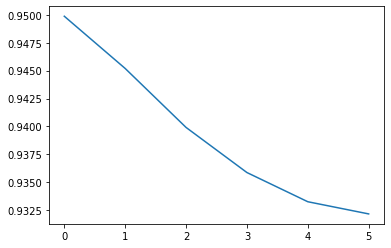

In [4]:
# Function to determine optimal number of clusters using KMeans
def find_optimal_clusters(data, min_clusters=4, max_clusters=10, sample_size=2000, random_state=42):
    ss_distances = []
    for n_clusters in range(min_clusters, max_clusters):
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(data[:sample_size])

        # Calculate sum of squared distances
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        diffs = data[:sample_size] - centers[labels]
        ss_distance = np.mean(np.einsum("ij,ij->i", diffs, diffs))
        ss_distances.append(ss_distance)

    return ss_distances

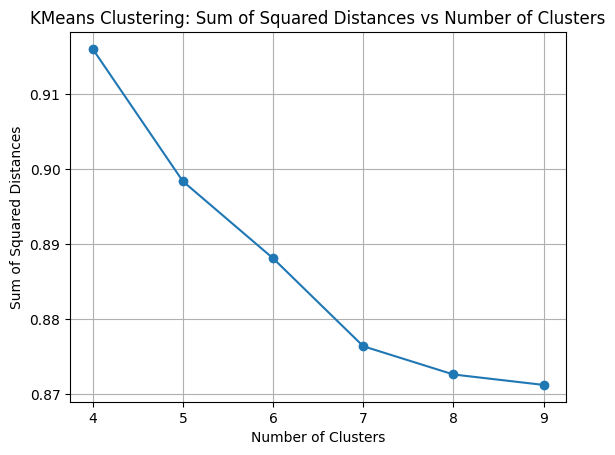

In [5]:
# Calculate sum of squared distances for cluster range and plot
ss_distances = find_optimal_clusters(X)
plt.plot(range(4, 10), ss_distances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('KMeans Clustering: Sum of Squared Distances vs Number of Clusters')
plt.xticks(range(4, 10))
plt.grid()
plt.show()

In [6]:
best_n_clusters = 7

In [7]:
len(df)

45863